In [1]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.constraints import maxnorm
from keras.utils import np_utils

In [2]:
from keras.datasets import cifar10
# loading in the data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

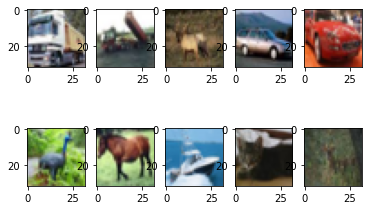

In [3]:
import matplotlib.pyplot as plt
for i in range(1,11):
    plt.subplot(2, 5, i)
    plt.imshow(X_train[i])

In [4]:
# normalize the inputs from 0-255 to between 0 and 1 by dividing by 255
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [5]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
class_num = y_test.shape[1]

In [11]:
from keras.models import load_model
# returns a compiled model
# identical to the previous one
model = load_model('model50.h5')

In [12]:
# Model evaluation
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 81.10%


In [8]:
#!pip install opencv-python-headless

Output Label: 9
truck


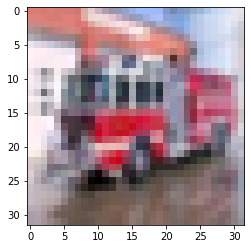

In [13]:
num_image=38
plt.imshow(X_test[num_image])

labels = ["airplane","automobile", "bird", "cat", "deer","dog", "frog", "horse", "ship", "truck"]
import cv2

resized_img = cv2.resize(X_test[num_image], (32,32))
resized_img= np.expand_dims(resized_img, axis=0)

pre=model.predict(resized_img)
n = np.argmax(pre)                                                     

print("Output Label:", n)
print(labels[n])

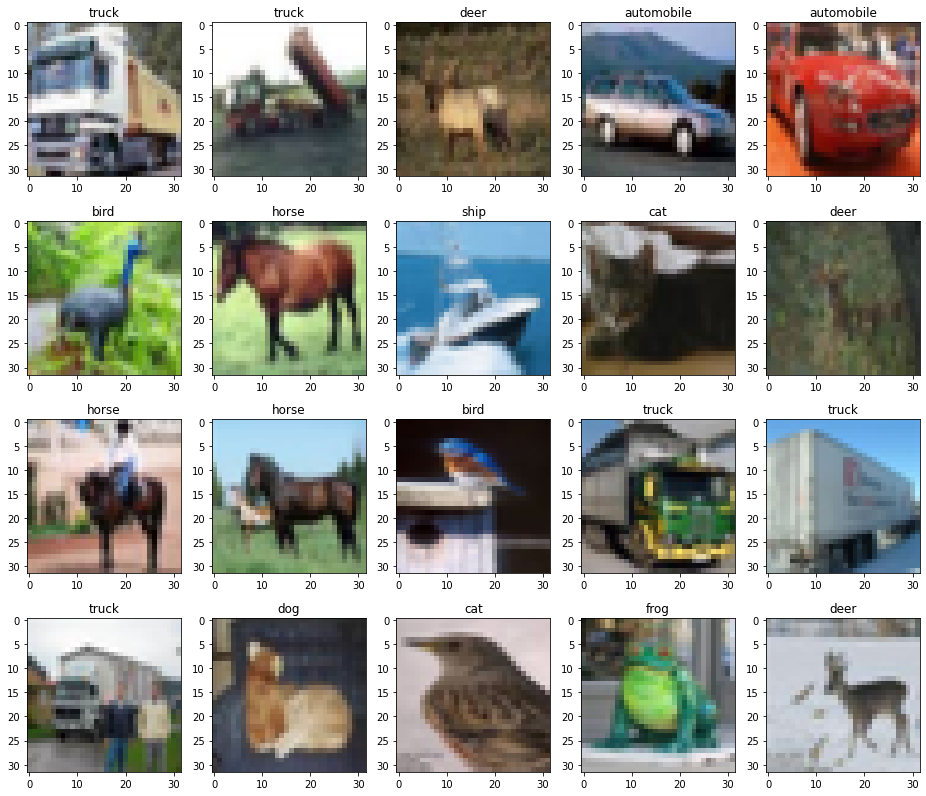

In [14]:
plt.figure(figsize=(16, 14)) 
for i in range(1,21):
    plt.subplot(4, 5, i)
    plt.imshow(X_train[i])
    resized_img = cv2.resize(X_train[i], (32,32))
    resized_img= np.expand_dims(resized_img, axis=0)
    pre=model.predict(resized_img)
    n = np.argmax(pre)  
    plt.title(labels[n])